In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv('E:/lab1_data/glass.csv')
data.drop('Id', axis=1, inplace=True)

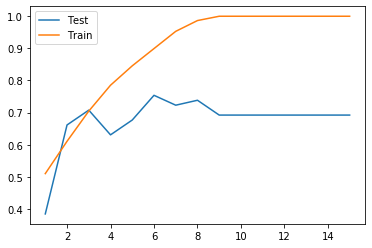

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['Type'], axis=1), 
    data['Type'], 
    test_size=0.3, random_state=44)
#With random_state = 44 we can get better accuracy

accuracy = []
accuracy_train = []

max_depth_list = [i for i in range(1,16)]
for max_depth in max_depth_list:
    model = tree.DecisionTreeClassifier(random_state=1, max_depth=max_depth)

    model.fit(x_train, y_train)
    tree_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, tree_pred))
    
    tree_predd = model.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, tree_predd))

plt.plot(max_depth_list, accuracy, label='Test')
plt.plot(max_depth_list, accuracy_train, label='Train')
plt.legend()

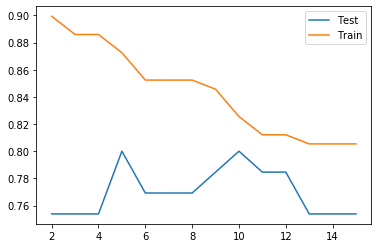

In [28]:
accuracy = []
accuracy_train = []
min_samples_split_list = [i for i in range(2,16)]
for min_samples_split in min_samples_split_list:
    model = tree.DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split=min_samples_split)

    model.fit(x_train, y_train)
    tree_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, tree_pred))
    
    tree_predd = model.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, tree_predd))

plt.plot(min_samples_split_list, accuracy, label='Test')
plt.plot(min_samples_split_list, accuracy_train, label='Train')
plt.legend()

Accuracy:  0.8


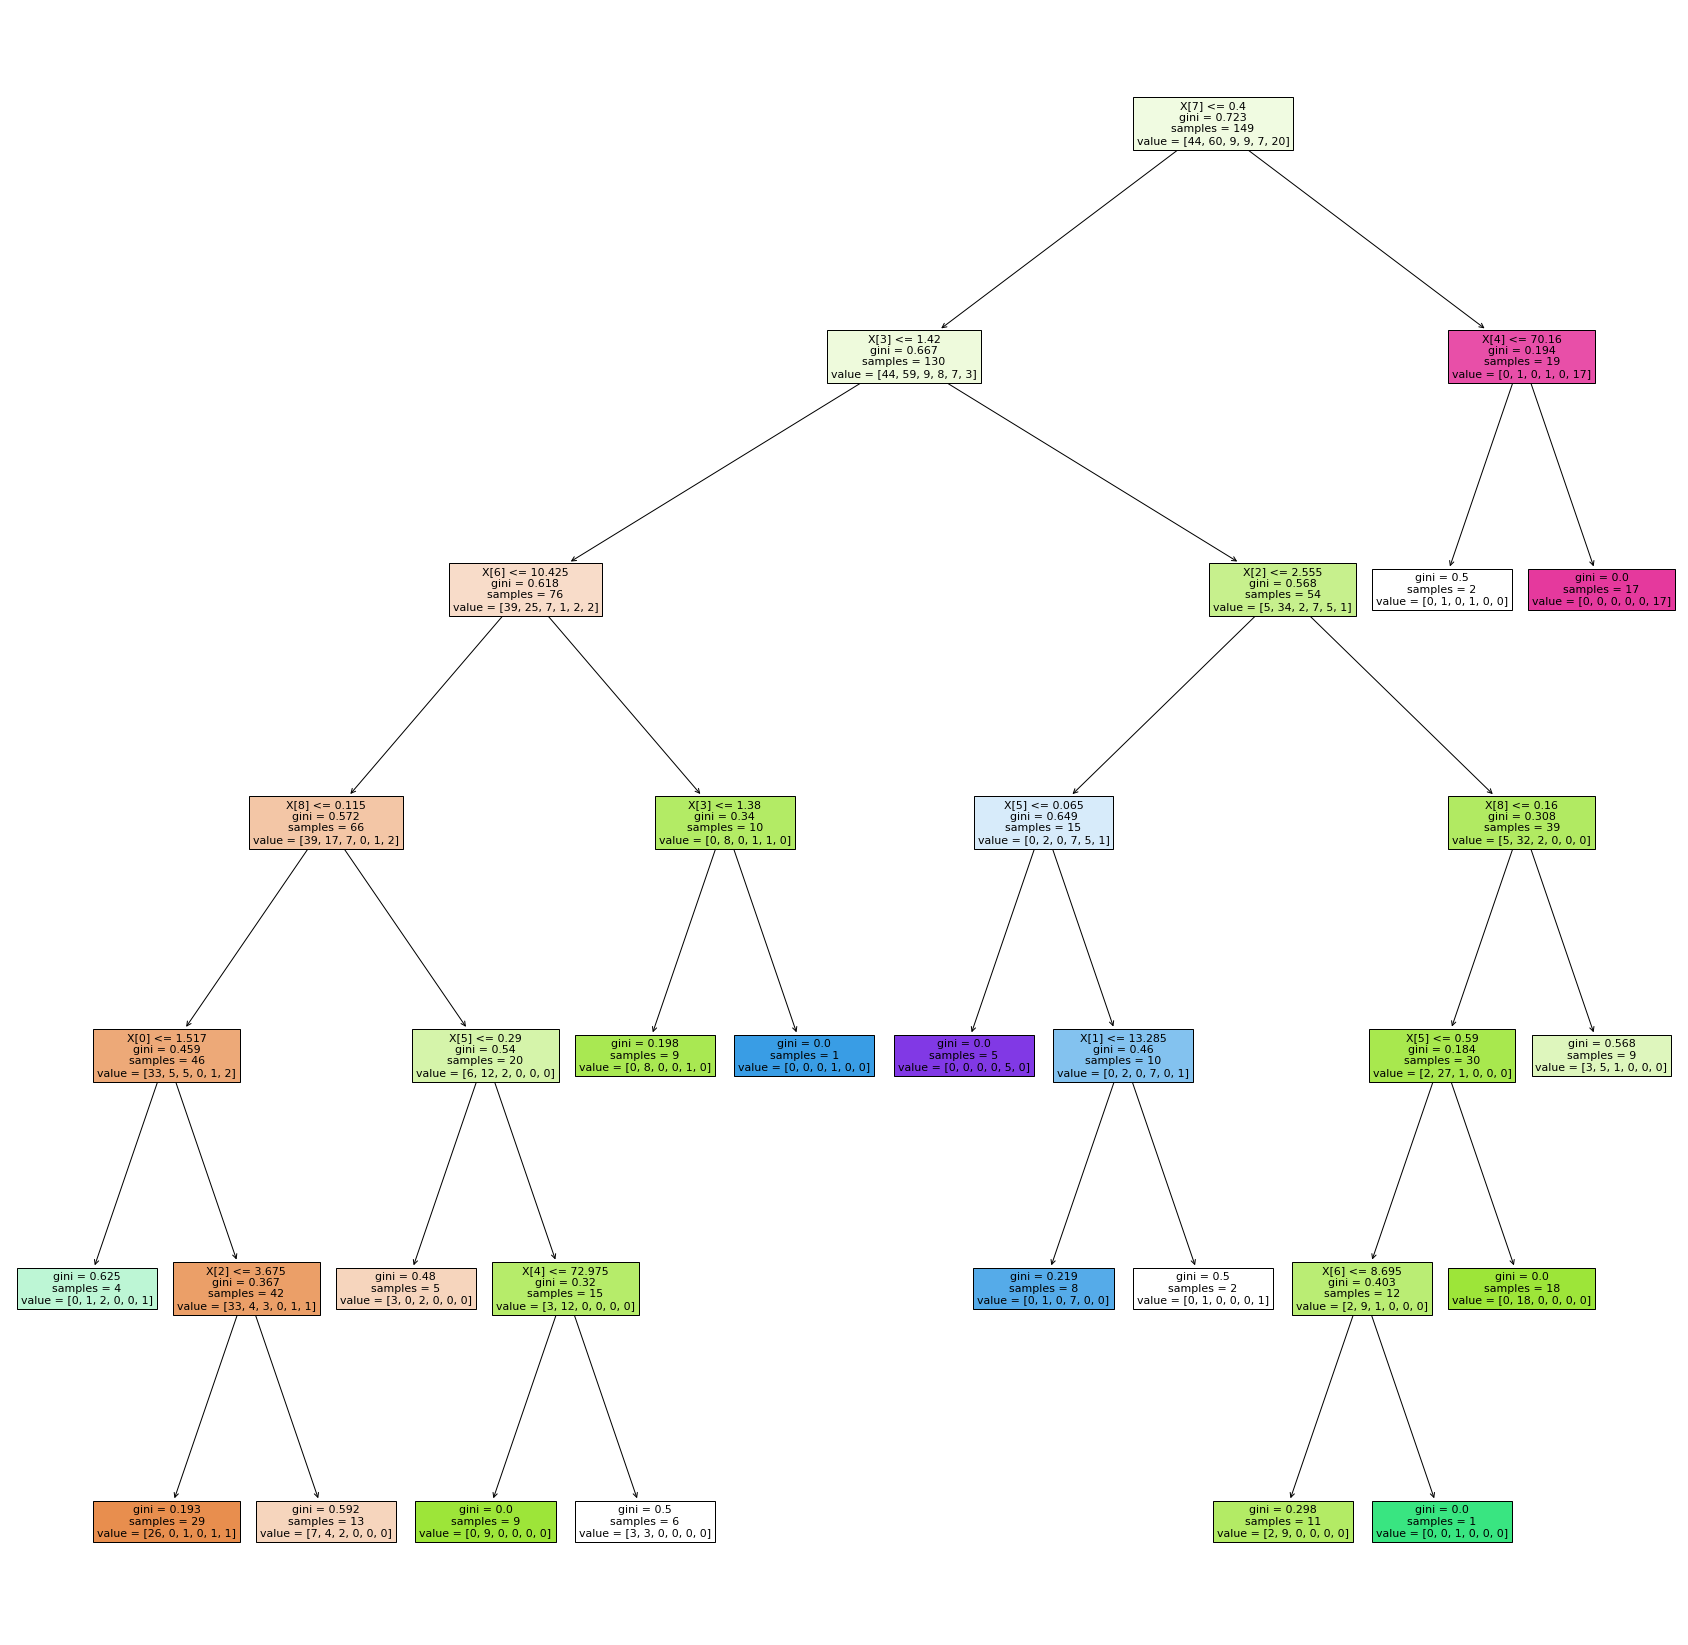

In [29]:
model = tree.DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split=10)
model.fit(x_train, y_train)
tree_pred = model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, tree_pred))

fig, axes = plt.subplots(figsize=(30, 30))
tree.plot_tree(model, filled=True, fontsize=11)
plt.show()

# Пункт "В"

In [31]:
data_b = pd.read_csv('E:/lab1_data/spam7.csv')
data_b.yesno = data_b.yesno.map({'y': 1, 'n': 0})

Accuracy:  0.8770099956540635


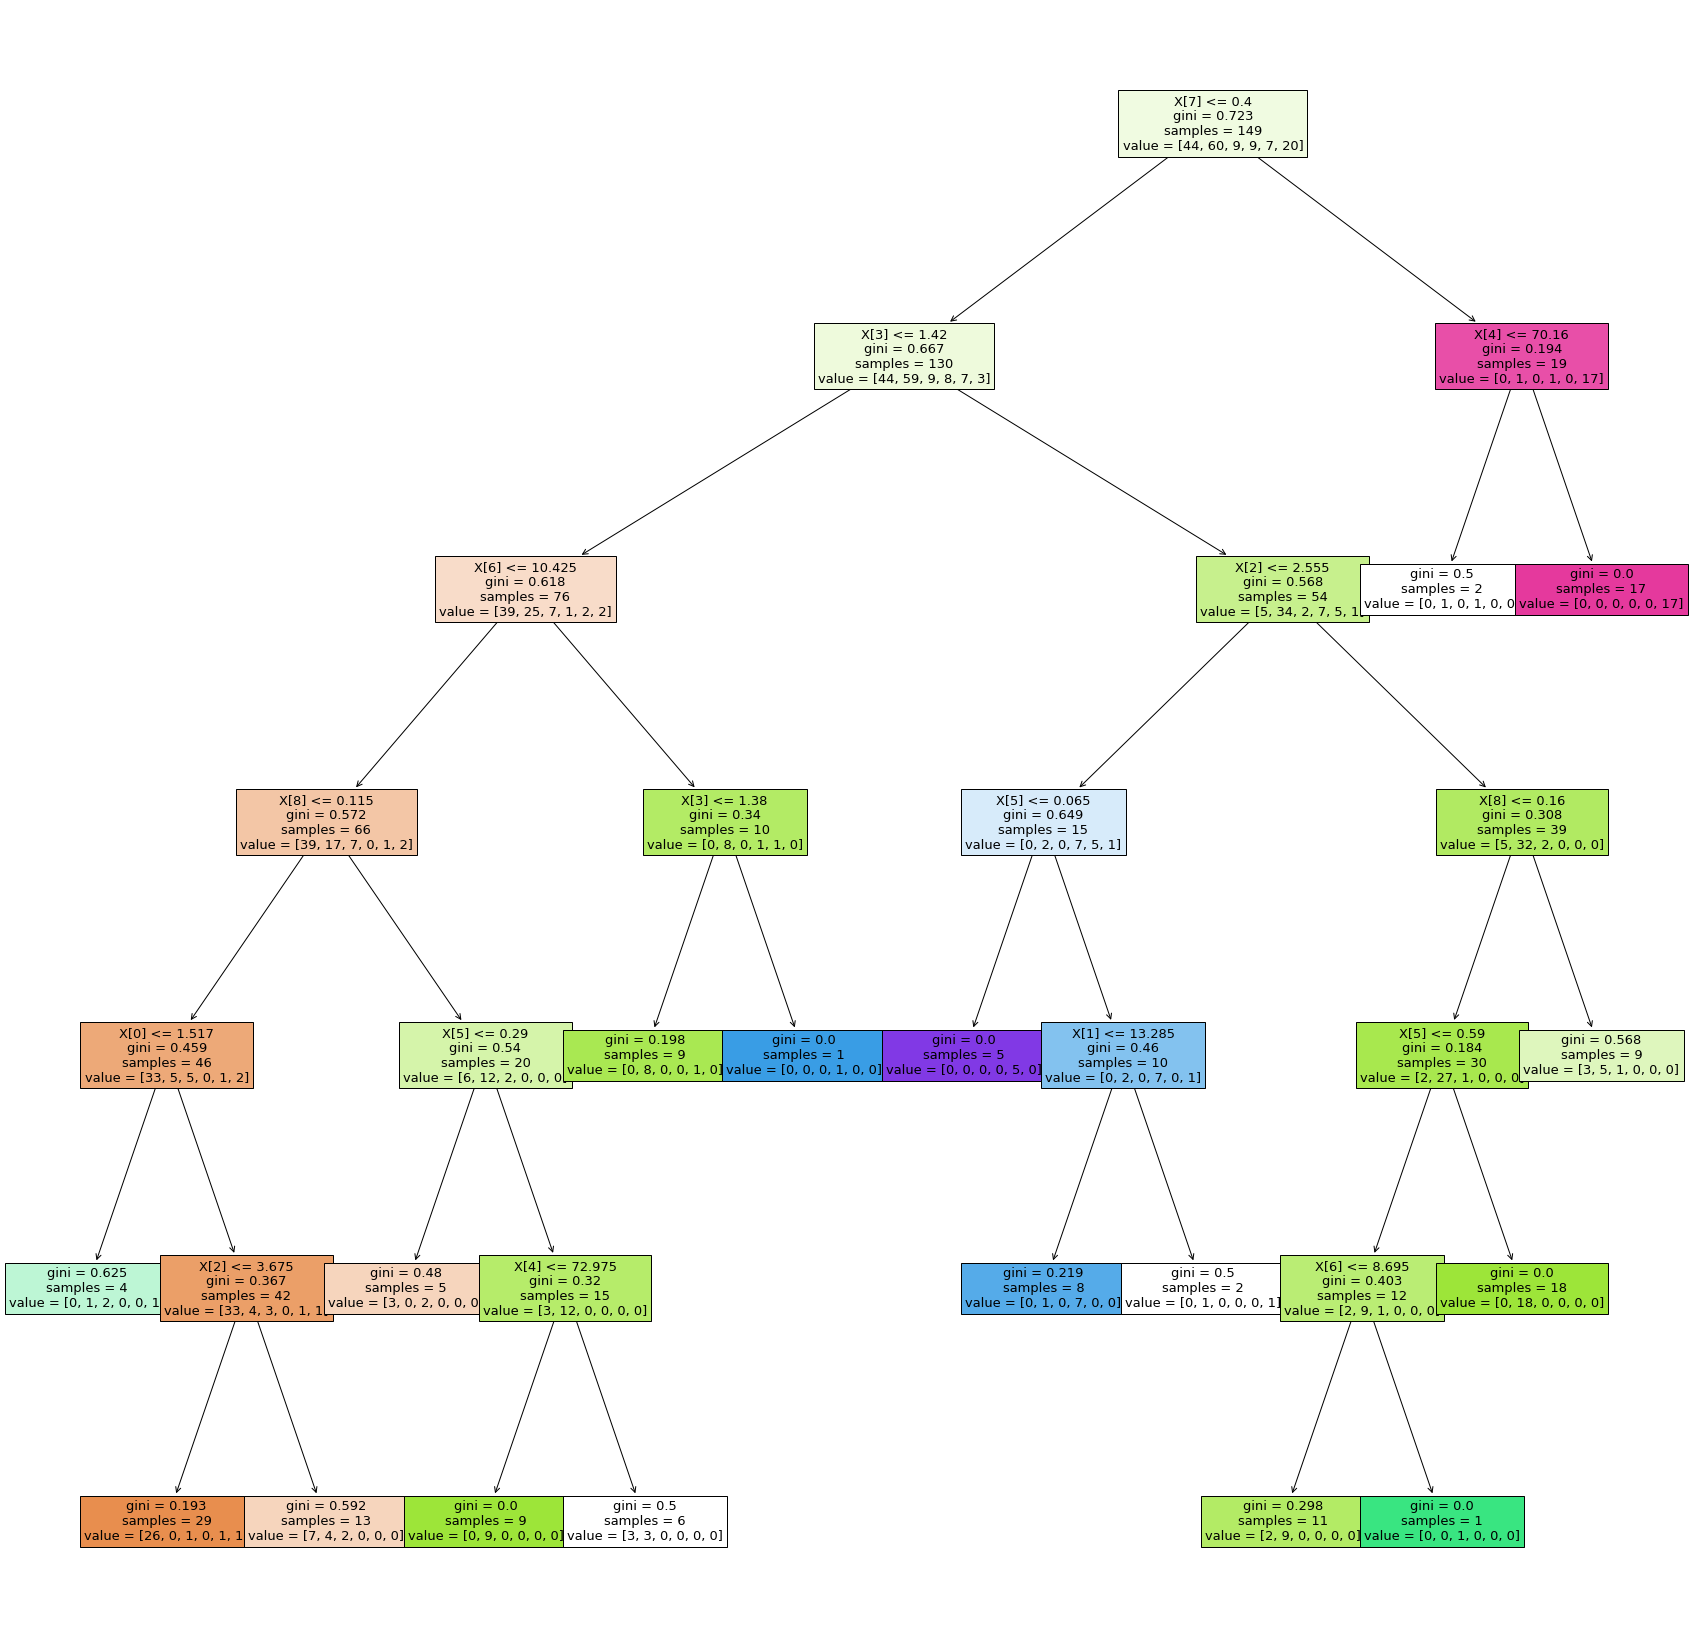

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    data_b.drop(['yesno'], axis=1), 
    data_b['yesno'], 
    test_size=0.5,
    random_state=44)

model_tree = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
model_tree.fit(x_train, y_train)
tree_pred = model_tree.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, tree_pred))

fig, axes = plt.subplots(figsize=(30, 30))
tree.plot_tree(model, filled=True, fontsize=13)
plt.show()